In [1]:

import networkx as nx
import random
import operator
import matplotlib.pyplot as plt
import time
import community
# def nei(n):
#     nei_neibor=[]
#     for nei_target in G:
#         try:
#             if length[n][1][nei_target]==1:
#                 nei_neibor.append(nei_target)
#         except:
#             continue

#     return nei_neibor
# 优先转移矩阵 随机游走矩阵


# def rand(rand_i):
#     return 1/G.degree(rand_i)


def pref(pref_i, pref_j, pref_k,total_N):  # 这个是 第k个粒子在第i个节点邻居节点j的 优先转移的概率
    return N_kong(pref_j)[pref_k]/total_N


def N_kong(N_kong_i):
    N_kong_0 = []
    total_N = 0
    for N_kong_k in range(K):
        total_N += N_cishu[N_kong_i][N_kong_k]
    for k in range(K):
        N_kong_0.append(N_cishu[N_kong_i][k]/total_N)
    return N_kong_0 # 返回两个量 第一个是控制矩阵，当前粒子访问节点i的相对频率，第二个是节点i被访问的总次数
# import random#这是一个按照概率选取数字的函数


def rand_pick(seq, probabilities):
    x = random.uniform(0, 1)
    cumprob = 0.0
    for item, item_pro in zip(seq, probabilities):
        cumprob += item_pro
        if x < cumprob:
            break
    return item
#  现在要设置一个能量变量


def E_test(E_test_k, E_test_j, E_test_lizi_t_1):
    test=0
    if lishu[lizi[E_test_k]] == lishu[E_test_lizi_t_1]:
        E[E_test_k][E_test_j]+=sanjiao
    else:
        E[E_test_k][E_test_j]-=sanjiao
    if E[E_test_k][E_test_j]>1:
        E[E_test_k][E_test_j]=1
    elif E[E_test_k][E_test_j]<0:
        E[E_test_k][E_test_j]=1
        test=1
        print(E_test_k,E_test_j)
    return test        
def E_best(E_best_k):
    return E[k].index(max(E[E_best_k]))


def tong_zitu (node_a, node_b):
    for tong_zitu_i in range(len(zitu)):
        if(node_a in zitu[tong_zitu_i]) and (node_b in zitu[tong_zitu_i]):
            return 1
    return 0
def jishi():
    import time
    return time.time()

In [2]:
#初始化
import xlrd
starttime=jishi()


# for wenjian in range(2,21):
#     #这个操作就是把真实数据到了进来
#     dakai=str(wenjian)
#     # book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\London-data\\'+str(dakai)+'.xlsx')
#     book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\London-data\\'+dakai+'.xlsx')
#     # sheet=book.sheet_by_name(str(dakai))'
#     sheet=book.sheet_by_name(dakai)
#     for i in range(1,sheet.nrows):
#         for j in range(2):
#             if(sheet.cell(i,j).value not in name_node_str):
#                 name_node_str.append(sheet.cell(i,j).value)
#                 name_node_num+=1
#                 name_node_int.append(name_node_num)


#     for i in range(1,sheet.nrows):
#             G.add_edge(name_node_str.index((sheet.cell(i,0).value)),name_node_str.index((sheet.cell(i,1).value)),weight=1)

G=nx.Graph()
G_test=nx.DiGraph()
N_cishu = []
K=0
chushi = 1
time=0
name_node_str=[]
name_node_int=[]
name_node_num=0
lishu = [-1]*name_node_num
time_max=0




ave_com=[0]*100
num_edge=0
num_node=0

com_list=[]



for T in range(2,15):
    #这个操作就是把真实数据到了进来
    dakai=str(T)
    book=xlrd.open_workbook(str(dakai)+'.xlsx')
#     book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\London-data\\nl\\q'+dakai+'.xlsx')
    sheet=book.sheet_by_name(str(dakai))
#     sheet=book.sheet_by_name('Sheet1')
    for i in range(1,sheet.nrows):
        for j in range(2):
            if(sheet.cell(i,j).value not in name_node_str):
                name_node_str.append(sheet.cell(i,j).value)
                name_node_num+=1
                name_node_int.append(name_node_num)

    for i in range(1,sheet.nrows):
            G.add_edge(name_node_str.index((sheet.cell(i,0).value)),name_node_str.index((sheet.cell(i,1).value)),weight=1)    
    num_node = len(G.nodes())
    num_edge=len(G.edges())
    #初始化 N-次数矩阵
    num_edge=G.number_of_edges()
    # 此时完成了数据导入G中
#     print('节点个数：',G.number_of_nodes())
#     print('边数为：',G.number_of_edges())##############标记
#         part = community.best_partition(G)
    num_node = len(G.nodes())
    num_edge=len(G.edges())
    #初始化 N-次数矩阵
    num_edge=G.number_of_edges()

    #粒子初始化#########

    zitu=list(nx.connected_components(G))
    xinzitu=[]
    if chushi==0 :
        for i in range(len(zitu)):
            if operator.eq(list(set(list(node_list))-set(list(zitu[i]))),node_list) :
                xinzitu.append(i)
                K+=1
    else:
        K=len(zitu)#粒子数量

    node_list=list(G.nodes())

    #如果不是初始化
    if chushi==0 :
        lizi_yuan_num=len(lizi)
        for i in xinzitu:
            lizi.append(random.sample(list(zitu[i]),1)[0])
    #         print(lizi[-1])#这个是输出当前新加的粒子
    else:
        lizi=[]
        for i in range(K):
            lizi.append(random.sample(list(zitu[i]),1)[0])


    N_cishu_zancun=N_cishu
    N_cishu=[]
    for i in G:
        N_cishu.append([1]*K)
    for i in range(len(N_cishu_zancun)):
        for j in range(len(N_cishu_zancun[i])):
            N_cishu[i][j]=N_cishu_zancun[i][j]
    # dict_cishu = {}#构建次数统计字典
    # for item in range(len(N_cishu)):
    #     dict_cishu[item]=(N_cishu[item])
    # print(dict_cishu)

    #初始化能量矩阵
    E=[]
    for i in range(K):
        E.append([0.5])
        for j in G:
            E[i].append(0.5)
    sanjiao=0.3
    t_c=[0]*K

    t=0
    for i in range(K):
        N_cishu[lizi[i]][t]+=1
    #     print(i,t,lizi[i])
        t+=1

    if chushi==1:
        chushi=0

    rand=[]
    for rand_i in G:
        if G.degree(rand_i)!=0 :
            rand.append(1/G.degree(rand_i))
        else:
            rand.append(1)
    ###########################游走开始####################
    #游走动态演示  初始颜色没更新 这个是画图的 但是我们现在不需要了 因为社区太多画图困难
    time_max=time+20
    num_node=G.number_of_nodes()
    #两种情况 若lishu没有 则新建 如果已经有了 就添加
    lishu_num=len(lishu)
    if lishu:
        for i in range(num_node-lishu_num):
            lishu.append(-1)
    else:
        lishu=[-1]*num_node
    bianliquan=1
    while (time < time_max) and (bianliquan == 1):#小的用这个
#     for time in tqdm.trange(time_max):
        bianliquan=0#bianliquan=1的时候说明还有没有遍历到的点，会导致隶属判断出错
        time+=1
        lizi_t_1=[-1]*K
        for i in range(num_node):#这里判断各个点的隶属情况
            lishu[i]=N_cishu[i].index(max(N_cishu[i]))
        for k in range(len(lizi)):#当前算第k个粒子

            rand_pref=[]
            total_k=0
            for j in G[lizi[k]]:
                total_k+=N_kong(j)[k]
            for j in G[lizi[k]]:#j是粒子邻居
                rand_pref.append(0.5*rand[lizi[k]]+0.5*pref(lizi[k],j,k,total_k))
            lizi_t_1[k]=lizi[k]
    #         print(k,lizi[k])
            if len(G[lizi[k]])>0 :
                lizi[k]=rand_pick(G[lizi[k]],rand_pref)


            if   lishu[lizi[k]]==lishu[lizi_t_1[k]]  :
                E[k][lizi[k]]=E[k][lizi[k]]+sanjiao
    #             print(k,lizi[k],E[k][lizi[k]],'+++')
            else:
                E[k][lizi[k]]-=sanjiao
    #             print(k,lizi[k],E[k][lizi[k]],'---')
    #             print(node_color[lizi[k]],node_color[lizi_t_1[k]],k,lizi,lizi_t_1)
            if E[k][lizi[k]]>1 :
                E[k][lizi[k]]=1
            elif E[k][lizi[k]]<0 :
    #             print(lizi[k],E_best(k))#这个是显示粒子回家的
                E[k][lizi[k]]=0
                lizi[k]=E_best(k)
            N_cishu[lizi[k]][k]+=1
        for i in range(len(N_cishu)):#现在是全部节点被遍历一遍可以结束 应该改成前后两个状态相似（收敛）
            if len(set(N_cishu[i]))==1 :
                bianliquan=1


        if time>2*time_max :
            break
    # print(lishu)
#     print(len(set(lishu)),'社区数量')############标记
#     print(len(zitu),'子图数量')############标记
#     part_SCL=dict(zip(range(num_node),lishu))
#     mod_SCL = community.modularity(part_SCL,G)
#     print('当前模块度：',mod_SCL)
    ##############################开始删社区###################
    bijiao=[]*K#列表呈现 4*4 行代表社区 列代表社区内节点在对应社区的得分
    for i in range(K):
        bijiao.append([])
        bijiao[i]=[0]*K
    for node in node_list:
        for lie in range(K):
            bijiao[lishu[node]][lie]+=N_cishu[node][lie]

    hb_list=[]
    for b_i in range(len(bijiao)):
        for b_j in range(len(bijiao[b_i])):
            if (bijiao[b_i][b_j] != max(bijiao[b_i])) and ((bijiao[b_i][b_j])  > (max(bijiao[b_i])/8)) and tong_zitu(lizi[b_i],lizi[b_j]):
                hb_list.append([b_i,b_j])

    for i in range(len(hb_list)):##这个是整理待合并粒子
        hb_list[i]=sorted(hb_list[i])
    
    count_hb=0
    for hb_ci in hb_list:
        if sorted(hb_ci,reverse=True)in hb_list :
            del hb_list[count_hb]
        else:
            count_hb+=1
    
    hb_i=0
    while 1:
        hb_j=hb_i+1
        while 1:
            if hb_j+1>len(hb_list):
                break
            if hb_list[hb_i]==hb_list[hb_j] :
                del hb_list[hb_j]
            else:
                hb_j+=1

        hb_i+=1
        if hb_i>=len(hb_list) :
            break  #     print(len(hb_list),hb_list)#这里面是粒子 代表社区#####################标记   
    #不能多执行 ################执行删除############

    partG=nx.Graph()
    for hb_num in range(len(hb_list)):
        partG.add_edge(hb_list[hb_num][0],hb_list[hb_num][1])
    part=list(nx.connected_components(partG))
    
    list_shan=[]

    for pp in part:
        shanchu=[]
        baoliu=list(sorted(list(pp),reverse=False))[0]
        shanchu=list(sorted(list(pp),reverse=False))[1:]
        for shanchu_j in sorted(list(shanchu),reverse=True):
            list_shan.append(shanchu_j)
            for shanchu_i in range(len(N_cishu)):#N_cishu处理。#将所有节点对应位置隶属程度减一
                N_cishu[shanchu_i][baoliu]+=N_cishu[shanchu_i][shanchu.index(shanchu_j)]-1#这个减一是除掉初始值影响
                del N_cishu[shanchu_i][shanchu.index(shanchu_j)]

    for del_lizi in sorted(list_shan,reverse=True):
        del lizi[del_lizi]
        for i in range(num_node):#这里判断各个点的隶属情况
            lishu[i]=N_cishu[i].index(max(N_cishu[i]))
        K=K-1


#     print(part)
    #计算模块度
    # values = [part.get(node) for node in G.nodes()]
    values =K
    try:
        num_com=values
#         print('社区数量：',num_com)
        com_list.append(num_com)
        ave_com[T]+=num_com
    except:
        print("初始")

        
    endtime = jishi()        
    dtime = endtime - starttime
    print('Number',T,'Total Time',dtime)

Number 2 Total Time 0.02464890480041504
Number 3 Total Time 0.04891252517700195
Number 4 Total Time 0.08086705207824707
Number 5 Total Time 0.13569426536560059
Number 6 Total Time 2.10916805267334
Number 7 Total Time 7.469187498092651


KeyboardInterrupt: 

0.022163867950439453


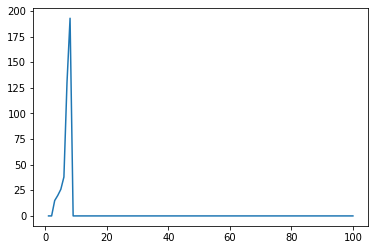

In [4]:
# DY　###############
starttime=jishi()
from pandas import Series
import xlrd
def max_nei(node,G,part):
    nei_list=[]
    for n in G[node]:
        nei_list.append(part[n])
    return max(nei_list,key=nei_list.count)
# workbook = xlwt.Workbook(encoding = 'ascii')
# worksheet = workbook.add_sheet('My Worksheet')
G=nx.Graph()
alpa_lishu=[]
alpa_shequ=[]
hang=0


shuaxin_list=[]

dakai=str(2)
book=xlrd.open_workbook(str(dakai)+'number_edge.xlsx')
# book=xlrd.open_workbook(str(dakai)+'number_edge.xlsx')
# sheet=book.sheet_by_name(str(dakai))'
# book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\London-data\\nl\\q'+str(dakai)+'q_num.xlsx')
# sheet=book.sheet_by_name(str(dakai))'
sheet=book.sheet_by_name('1')


for i in range(1,sheet.nrows):
    add_node1=int(sheet.cell(i,0).value)
    add_node2=int(sheet.cell(i,1).value)
    G.add_edge(add_node1,add_node2,weight=1)
    num_node=G.number_of_nodes()
    num_edge=G.number_of_edges()
part=community.best_partition(G)
print('初始节点',num_node)
print(len(set(part.values())))
endtime = jishi()
dtime = endtime - starttime
print(dakai,dtime)

for wenjian in range(3,15):
    #这个操作就是把真实数据到了进来
    dakai=str(wenjian)
    book=xlrd.open_workbook(str(dakai)+'number_edge.xlsx')
#     book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\London-data\\nl\\q'+str(dakai)+'q_num.xlsx')
    # sheet=book.sheet_by_name(str(dakai))'
    sheet=book.sheet_by_name('1')

                
    for i in range(1,sheet.nrows):
        add_node1=int(sheet.cell(i,0).value)
        add_node2=int(sheet.cell(i,1).value)
        G.add_edge(add_node1,add_node2,weight=1)
        num_node=G.number_of_nodes()
        num_edge=G.number_of_edges()




        if (G.degree((add_node1))) + (G.degree((add_node2))) == 2: # 新增孤立节点则新增社区
    #         print('guli:',add_node1,add_node2)
#             alpa_shequ.append([add_node1,add_node2]) #社区更新
            part[add_node1]=max(part.values())+1
            part[add_node2]=part[add_node1]
    #         print('孤立',alpa_lishu[add_node1],alpa_lishu[add_node2],'社区',len(alpa_shequ),alpa_shequ[-1])
        elif (G.degree(add_node1) == 1) or (G.degree(add_node2) == 1): # 社区内新增边
    #         print('内部:',add_node1,add_node2)
            if (G.degree(add_node1)) > 1: # add_node1是原网络的节点
                part[add_node2] = part[add_node1] # add_node2的社区和1 一样
#                 alpa_shequ[alpa_lishu[add_node1]].append(add_node2) # add_node1的社区中添加2
    #             print('社区',alpa_lishu[add_node1],alpa_shequ[alpa_lishu[add_node1]])
            else:
                part[add_node1] = part[add_node2]
#                 if alpa_lishu[add_node2] != -1:
#                     alpa_shequ[alpa_lishu[add_node2]].append(add_node1)
    #             print('社区',alpa_lishu[add_node2],alpa_shequ[alpa_lishu[add_node2]])
        elif ((G.degree(add_node1))>1) and ((G.degree(add_node2))>1): # 社区间新增边
            part[add_node1]=max_nei(add_node1,G,part)
            part[add_node2]=max_nei(add_node2,G,part)
    #         print('已存在的节点:',add_node1,add_node2)
            if part[add_node1]!=part[add_node2]:
                shuaxin_list.append(part[add_node1])
                shuaxin_list.append(part[add_node2]) # 将目标社区的节点加入节点群中

    

    temp_node=[]
#     for i_shua_shequ in (shuaxin_list):#这是社区值
    for nn,shequ in part.items():
        if shequ in shuaxin_list:
            temp_node.append(nn)

    G_temp=G.copy()
    G_temp.remove_nodes_from(set(list(G.nodes()))-set(temp_node))
    part_dy=community.best_partition(G_temp)
#     print('temp社区',len(set(part_dy.values())))
    
    for i in part_dy:
        part_dy[i]=max(set(part.values()))+part_dy[i]# 更新G_dy社区编号 和大社区不重合
    part.update(part_dy)
    num_node = len(G.nodes())
    num_edge = G.number_of_edges()
    # 此时完成了数据导入G中
#     print('节点个数：', num_node,'temp占比',len(part_dy)/num_node)
#     worksheet.write(wenjian,0,label=num_node)
#     print(len(set(part.values())))
#     worksheet.write(wenjian,1,label=len(set(part.values())))
    endtime = jishi()
    dtime=endtime-starttime
    print('Number:',dakai,'Total Time:',dtime)

初始节点 39
15
2 0.26137542724609375
Number: 3 Total Time: 0.2709341049194336
Number: 4 Total Time: 0.2768981456756592
Number: 5 Total Time: 0.2983410358428955
Number: 6 Total Time: 2.0727200508117676


KeyboardInterrupt: 

In [5]:
##modularity based#
starttime=jishi()
import xlrd
import xlwt
workbook=xlwt.Workbook(encoding='ascii')
worksheet=workbook.add_sheet('Sheet1')
G=nx.Graph()
name_node_str=[]
name_node_num=0
name_node_int=[]
G=nx.Graph()
endtime=[]
for wenjian in range(1,14):
    #这个操作就是把真实数据到了进来
    dakai=str(wenjian)
    book=xlrd.open_workbook(str(dakai)+'.xlsx')
#     book=xlrd.open_workbook('E:\\SCI\\仿照参考\\code\\London-data\\nl\\q'+str(dakai)+'q_num.xlsx')
    sheet=book.sheet_by_name(str(dakai))
#     sheet=book.sheet_by_name('1')

      
        
    for i in range(1,sheet.nrows):
        for j in range(2):
            if(sheet.cell(i,j).value not in name_node_str):
                name_node_str.append(sheet.cell(i,j).value)
                name_node_num+=1
                name_node_int.append(name_node_num)    
    
    for i in range(1,sheet.nrows):
        add_node1=name_node_str.index((sheet.cell(i,0).value))
        add_node2=name_node_str.index((sheet.cell(i,1).value))
        G.add_edge(add_node1,add_node2,weight=1)
#         print('添加节点1',add_node1)
#         print('添加节点2',add_node2)
    num_node=G.number_of_nodes()
    num_edge=G.number_of_edges()
#     algorithm = LPA(G)
#     communities_lpa = algorithm.execute()
#     print(len(communities_lpa))
    part=community.best_partition(G)
#     print(part)
#     print('节点',len(G))
    endtime.append(jishi()-starttime)
for i in range(13):
    print('Number',i)
    print('Total time',endtime[i])

KeyboardInterrupt: 

In [21]:
starttime=jishi()
import math
import xlrd
import xlwt

book=xlrd.open_workbook('G.xls')
sheet=book.sheet_by_name('Sheet1')
node=[]
edge=[]
inc=[]
dec=[]
k=[]
for i in range(14):
    node.append(int(sheet.cell(i,0).value))
    edge.append(int(sheet.cell(i,1).value))
    
for i in range(13):
    k.append(int(sheet.cell(i,2).value))
DD=[]
EE=[]
II=[]
JJ=[]
LL=[]

for i in range(14):
    II.append(edge[i]/node[i])
    DD.append(-2*edge[i]/node[i])
    EE.append(math.exp(DD[i]))
for i in range(1,14):
    JJ.append(node[i]-node[i-1])
    LL.append(JJ[i-1]*EE[i])
    inc.append(LL[i-1]*0.15)
print(inc)
PP=[]
for i in range(13):
    PP.append(k[i]*(II[i+1]-II[i]))
    dec.append(PP[i]*2.6)
print(dec)
dtime=jishi()-starttime
for i in range(13):
    print('Number',i,'Time',i*dtime/13)

[1.1828746859502273, 0.7687220384232742, 1.040535711851055, 2.4108887557570435, 89.29529228867824, 104.77249405215098, 53.82990208010296, 5.245019204770057, 3.791565933271252, 4.51614648640169, 2.0980907196478156, 0.1942787590628813, 1.4014312748187348]
[1.8000000000000005, 2.0689655172413763, 2.7626303127506047, 5.844460494005489, -1.2747050282728467, 75.23428408321192, 131.70292778466884, -0.5898084047707992, -0.34407443217539857, 3.652472051876372, -0.09658266454594581, -0.004827923345499752, -0.1437570007905475]
Number 0 Time 0.0
Number 1 Time 0.0
Number 2 Time 0.0
Number 3 Time 0.0
Number 4 Time 0.0
Number 5 Time 0.0
Number 6 Time 0.0
Number 7 Time 0.0
Number 8 Time 0.0
Number 9 Time 0.0
Number 10 Time 0.0
Number 11 Time 0.0
Number 12 Time 0.0


[27]